## Generate weekly statistics (mean, median, mode) for number of new cases across a specific state.


In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [2]:
#I have selected the Albama state for analysis
selected_state = "AL"
# reading the confirmed data
cases = pd.read_csv("../data/covid_confirmed_usafacts.csv")
cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-01-07,2023-01-08,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-14,2023-01-15,2023-01-16
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19205,19205,19205,19205,19205,19318,19318,19318,19318,19318
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,68182,68182,68182,68182,68182,68518,68518,68518,68518,68518
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7120,7120,7120,7120,7120,7188,7188,7188,7188,7188
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,7808,7808,7808,7808,7808,7855,7855,7855,7855,7855


In [3]:
# using the melt function so that we get the all the dates in one column and merging will be easy with enrichment data.
cases_transpose = pd.melt(frame = cases, id_vars=('countyFIPS','County Name','State','StateFIPS'),var_name=["Date"],value_name='Number of Cases')
cases_transpose = cases_transpose[cases_transpose['countyFIPS'] != 0]
cases_transpose.head()

,countyFIPS,County Name,State,StateFIPS,Date,Number of Cases
1,1001,Autauga County,AL,1,2020-01-22,0
2,1003,Baldwin County,AL,1,2020-01-22,0
3,1005,Barbour County,AL,1,2020-01-22,0
4,1007,Bibb County,AL,1,2020-01-22,0
5,1009,Blount County,AL,1,2020-01-22,0


In [4]:
#displaying the data of the selected state.
cases_selected_state = cases_transpose[cases_transpose["State"] == selected_state]
cases_selected_state.head()

,countyFIPS,County Name,State,StateFIPS,Date,Number of Cases
1,1001,Autauga County,AL,1,2020-01-22,0
2,1003,Baldwin County,AL,1,2020-01-22,0
3,1005,Barbour County,AL,1,2020-01-22,0
4,1007,Bibb County,AL,1,2020-01-22,0
5,1009,Blount County,AL,1,2020-01-22,0


In [5]:
#For the selected state Albama summing the cases per day of all the counties.
cases_selected_state_daily = cases_selected_state.groupby('Date')['Number of Cases'].sum()
cases_selected_state_daily.head()

Date
2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    0
Name: Number of Cases, dtype: int64

In [6]:
#Finding out the new cases per day.
new_cases_selected_state_daily = cases_selected_state_daily.diff().reset_index()
new_cases_selected_state_daily.head()

,Date,Number of Cases
0,2020-01-22,NaN
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0


In [7]:
#Converting the daily to weekly analysis and finding the mean weekly.
weekly_cases_mean_selected_state = new_cases_selected_state_daily.copy()
weekly_cases_mean_selected_state['Date'] = pd.to_datetime(weekly_cases_mean_selected_state['Date']) - pd.to_timedelta(7, unit='d')
weekly_cases_mean_selected_state = weekly_cases_mean_selected_state.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Cases'].mean()
weekly_cases_mean_selected_state = weekly_cases_mean_selected_state.reset_index()
weekly_cases_mean_selected_state.head()

,Date,Number of Cases
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [8]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_cases_mean_selected_state_given_range = weekly_cases_mean_selected_state[(weekly_cases_mean_selected_state["Date"] >= '2022-05-29') & (weekly_cases_mean_selected_state["Date"] <= '2023-01-02')]
weekly_cases_mean_selected_state_given_range = weekly_cases_mean_selected_state_given_range.sort_values(by=['Date']).reset_index(drop=True)
weekly_cases_mean_selected_state_given_range['Date'] = weekly_cases_mean_selected_state_given_range['Date'] + pd.to_timedelta(1, unit='d')
weekly_cases_mean_selected_state_given_range

,Date,Number of Cases
0,2022-05-30,806.857143
1,2022-06-06,1190.285714
2,2022-06-13,1374.285714
3,2022-06-20,1612.428571
4,2022-06-27,1826.142857
5,2022-07-04,2090.428571
6,2022-07-11,2378.428571
7,2022-07-18,2480.857143
8,2022-07-25,2387.428571
9,2022-08-01,1721.000000


<AxesSubplot: title={'center': 'Mean of Weekly Alabama Cases'}, xlabel='Date'>

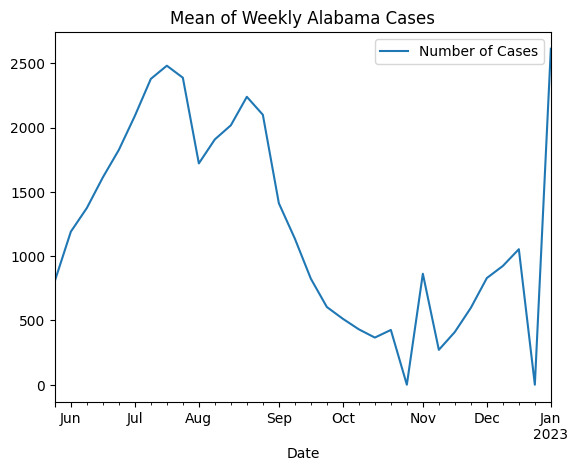

In [9]:
#Plotting the mean graph
weekly_cases_mean_selected_state_given_range.plot(x='Date', y='Number of Cases', title='Mean of Weekly Alabama Cases')

In [10]:
#Converting the daily to weekly analysis and finding the median weekly.
weekly_cases_median_selected_state = new_cases_selected_state_daily.copy()
weekly_cases_median_selected_state['Date'] = pd.to_datetime(weekly_cases_median_selected_state['Date']) - pd.to_timedelta(7, unit='d')
weekly_cases_median_selected_state = weekly_cases_median_selected_state.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Cases'].median()
weekly_cases_median_selected_state = weekly_cases_median_selected_state.reset_index()
weekly_cases_median_selected_state.head()

,Date,Number of Cases
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [11]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_cases_median_selected_state_given_range = weekly_cases_median_selected_state[(weekly_cases_median_selected_state["Date"] >= '2022-05-29') & (weekly_cases_median_selected_state["Date"] <= '2023-01-02')]
weekly_cases_median_selected_state_given_range = weekly_cases_median_selected_state_given_range.sort_values(by=['Date']).reset_index(drop=True)
weekly_cases_median_selected_state_given_range['Date'] = weekly_cases_median_selected_state_given_range['Date'] + pd.to_timedelta(1, unit='d')
weekly_cases_median_selected_state_given_range

,Date,Number of Cases
0,2022-05-30,971.0
1,2022-06-06,1183.0
2,2022-06-13,1625.0
3,2022-06-20,2035.0
4,2022-06-27,1926.0
5,2022-07-04,2892.0
6,2022-07-11,2699.0
7,2022-07-18,2889.0
8,2022-07-25,2685.0
9,2022-08-01,0.0


<AxesSubplot: title={'center': 'Median of Weekly Albama Cases'}, xlabel='Date'>

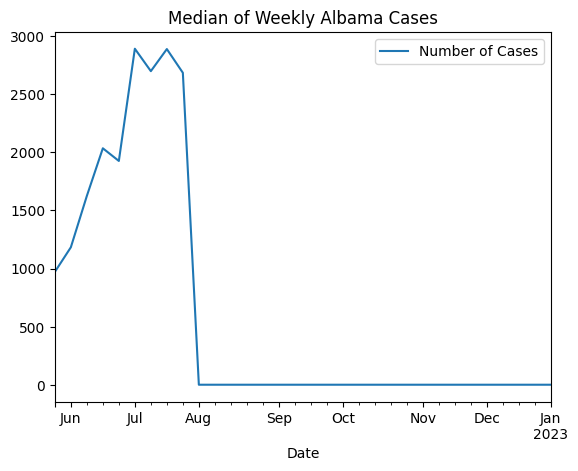

In [12]:
#Plotting the median graph
weekly_cases_median_selected_state_given_range.plot(x='Date', y='Number of Cases', title = 'Median of Weekly Albama Cases')

In [13]:
#Converting the daily to weekly analysis and finding the mode weekly.
weekly_cases_mode_selected_state = new_cases_selected_state_daily.copy()
weekly_cases_mode_selected_state['Date'] = pd.to_datetime(weekly_cases_mode_selected_state['Date']) - pd.to_timedelta(7, unit='d')
weekly_cases_mode_selected_state = weekly_cases_mode_selected_state.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Cases'].apply(statistics.mode)
weekly_cases_mode_selected_state = weekly_cases_mode_selected_state.reset_index()
weekly_cases_mode_selected_state.head()

,Date,Number of Cases
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [14]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_cases_mode_selected_state_given_range = weekly_cases_mode_selected_state[(weekly_cases_mode_selected_state["Date"] >= '2022-05-29') & (weekly_cases_mode_selected_state["Date"] <= '2023-01-02')]
weekly_cases_mode_selected_state_given_range = weekly_cases_mode_selected_state_given_range.sort_values(by=['Date']).reset_index(drop=True)
weekly_cases_mode_selected_state_given_range['Date'] = weekly_cases_mode_selected_state_given_range['Date'] + pd.to_timedelta(1, unit='d')
weekly_cases_mode_selected_state_given_range

,Date,Number of Cases
0,2022-05-30,0.0
1,2022-06-06,0.0
2,2022-06-13,0.0
3,2022-06-20,0.0
4,2022-06-27,0.0
5,2022-07-04,0.0
6,2022-07-11,0.0
7,2022-07-18,0.0
8,2022-07-25,0.0
9,2022-08-01,0.0


<AxesSubplot: title={'center': 'Mode of Weekly Albama Cases'}, xlabel='Date'>

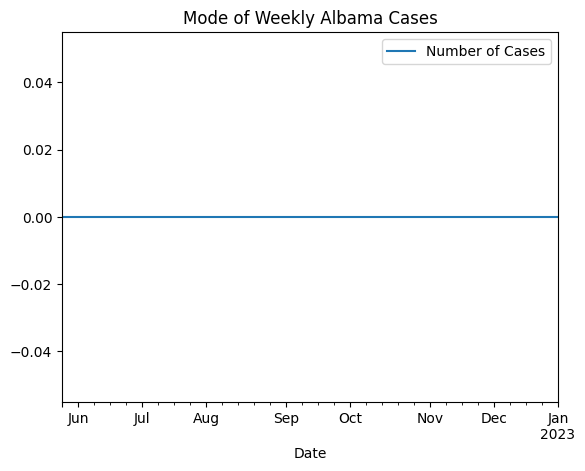

In [15]:
#Plotting the mode graph
weekly_cases_mode_selected_state_given_range.plot(x='Date', y='Number of Cases', title = 'Mode of Weekly Albama Cases')

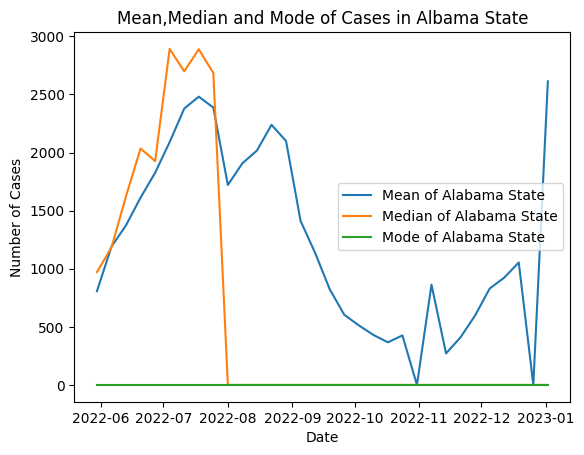

In [16]:
#plotting the mean,median and mode graphs.
plt.plot(weekly_cases_mean_selected_state_given_range['Date'], weekly_cases_mean_selected_state_given_range['Number of Cases'], label='Mean of Alabama State')
plt.plot(weekly_cases_median_selected_state_given_range['Date'], weekly_cases_median_selected_state_given_range['Number of Cases'], label='Median of Alabama State')
plt.plot(weekly_cases_mode_selected_state_given_range['Date'], weekly_cases_mode_selected_state_given_range['Number of Cases'], label='Mode of Alabama State')
plt.title('Mean,Median and Mode of Cases in Albama State')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

In [17]:
!export PATH=/Library/TeX/texbin:$PATH

'export' is not recognized as an internal or external command,
operable program or batch file.
